## Linear regression
**Linear Regression** is simple but one of the most powerful modeling techinque in Machine Learning. In the notebook follwing topics are discussed.

* Linear regression basics
* Linear regression computational scaling as a function of number of features and number of observations.
* Regularization. 
   * Ridge. 
   * LASSO.
* Model selection using forward selection.

### Linear regression basics

Linear regression coefficients are given by 
$\hat{\beta} = (X^TX)^{-1}(X^TY)$, where $\hat{\beta}$ is a vector of dimension ($m \times 1$) and $X$ is a matrix of dimension ($n \times m$), $Y$ is a vector of dimension ($n \times 1$). 

In [1]:
#import libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
import seaborn as sns

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
%matplotlib inline

In [6]:
#Load diabetes dataset
data = datasets.load_diabetes(as_frame=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b5bee50>,
      dtype=object)

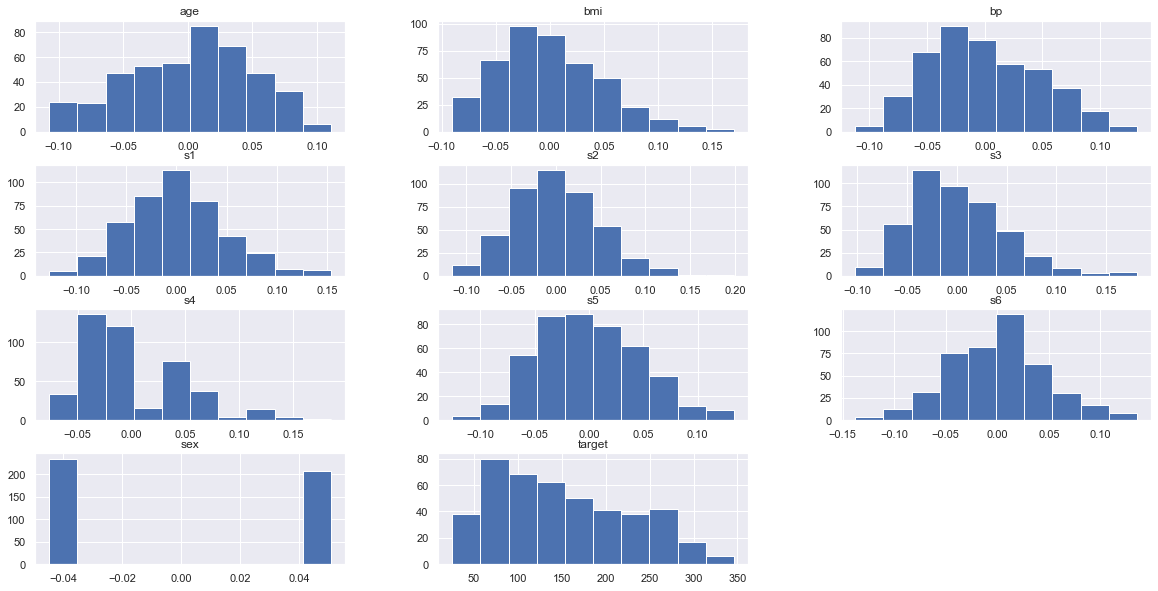

In [14]:
data["frame"].hist()

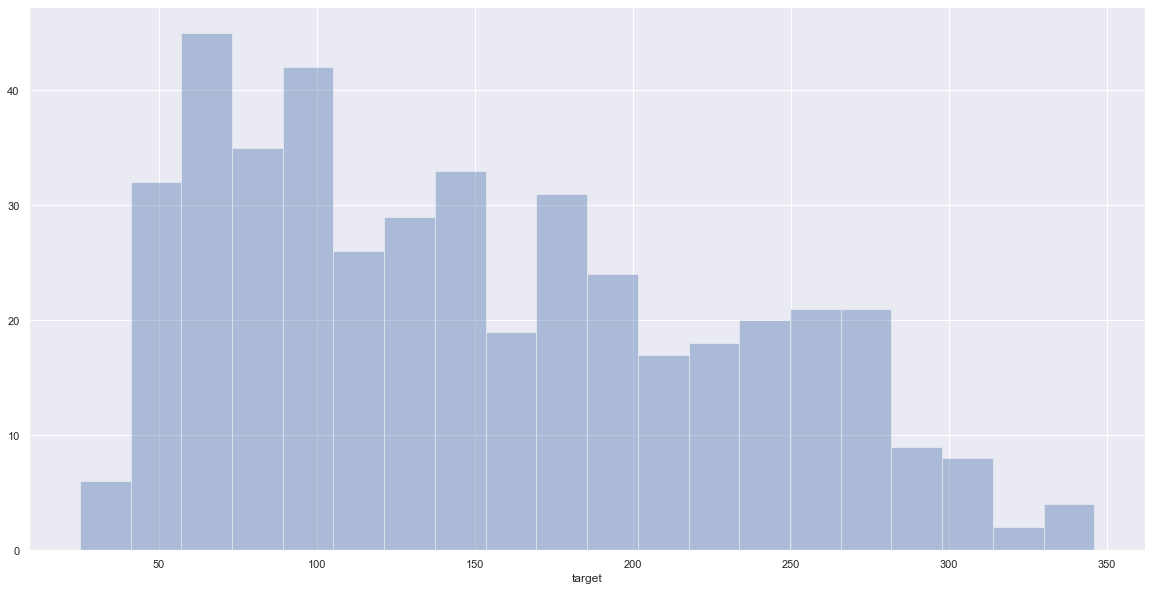

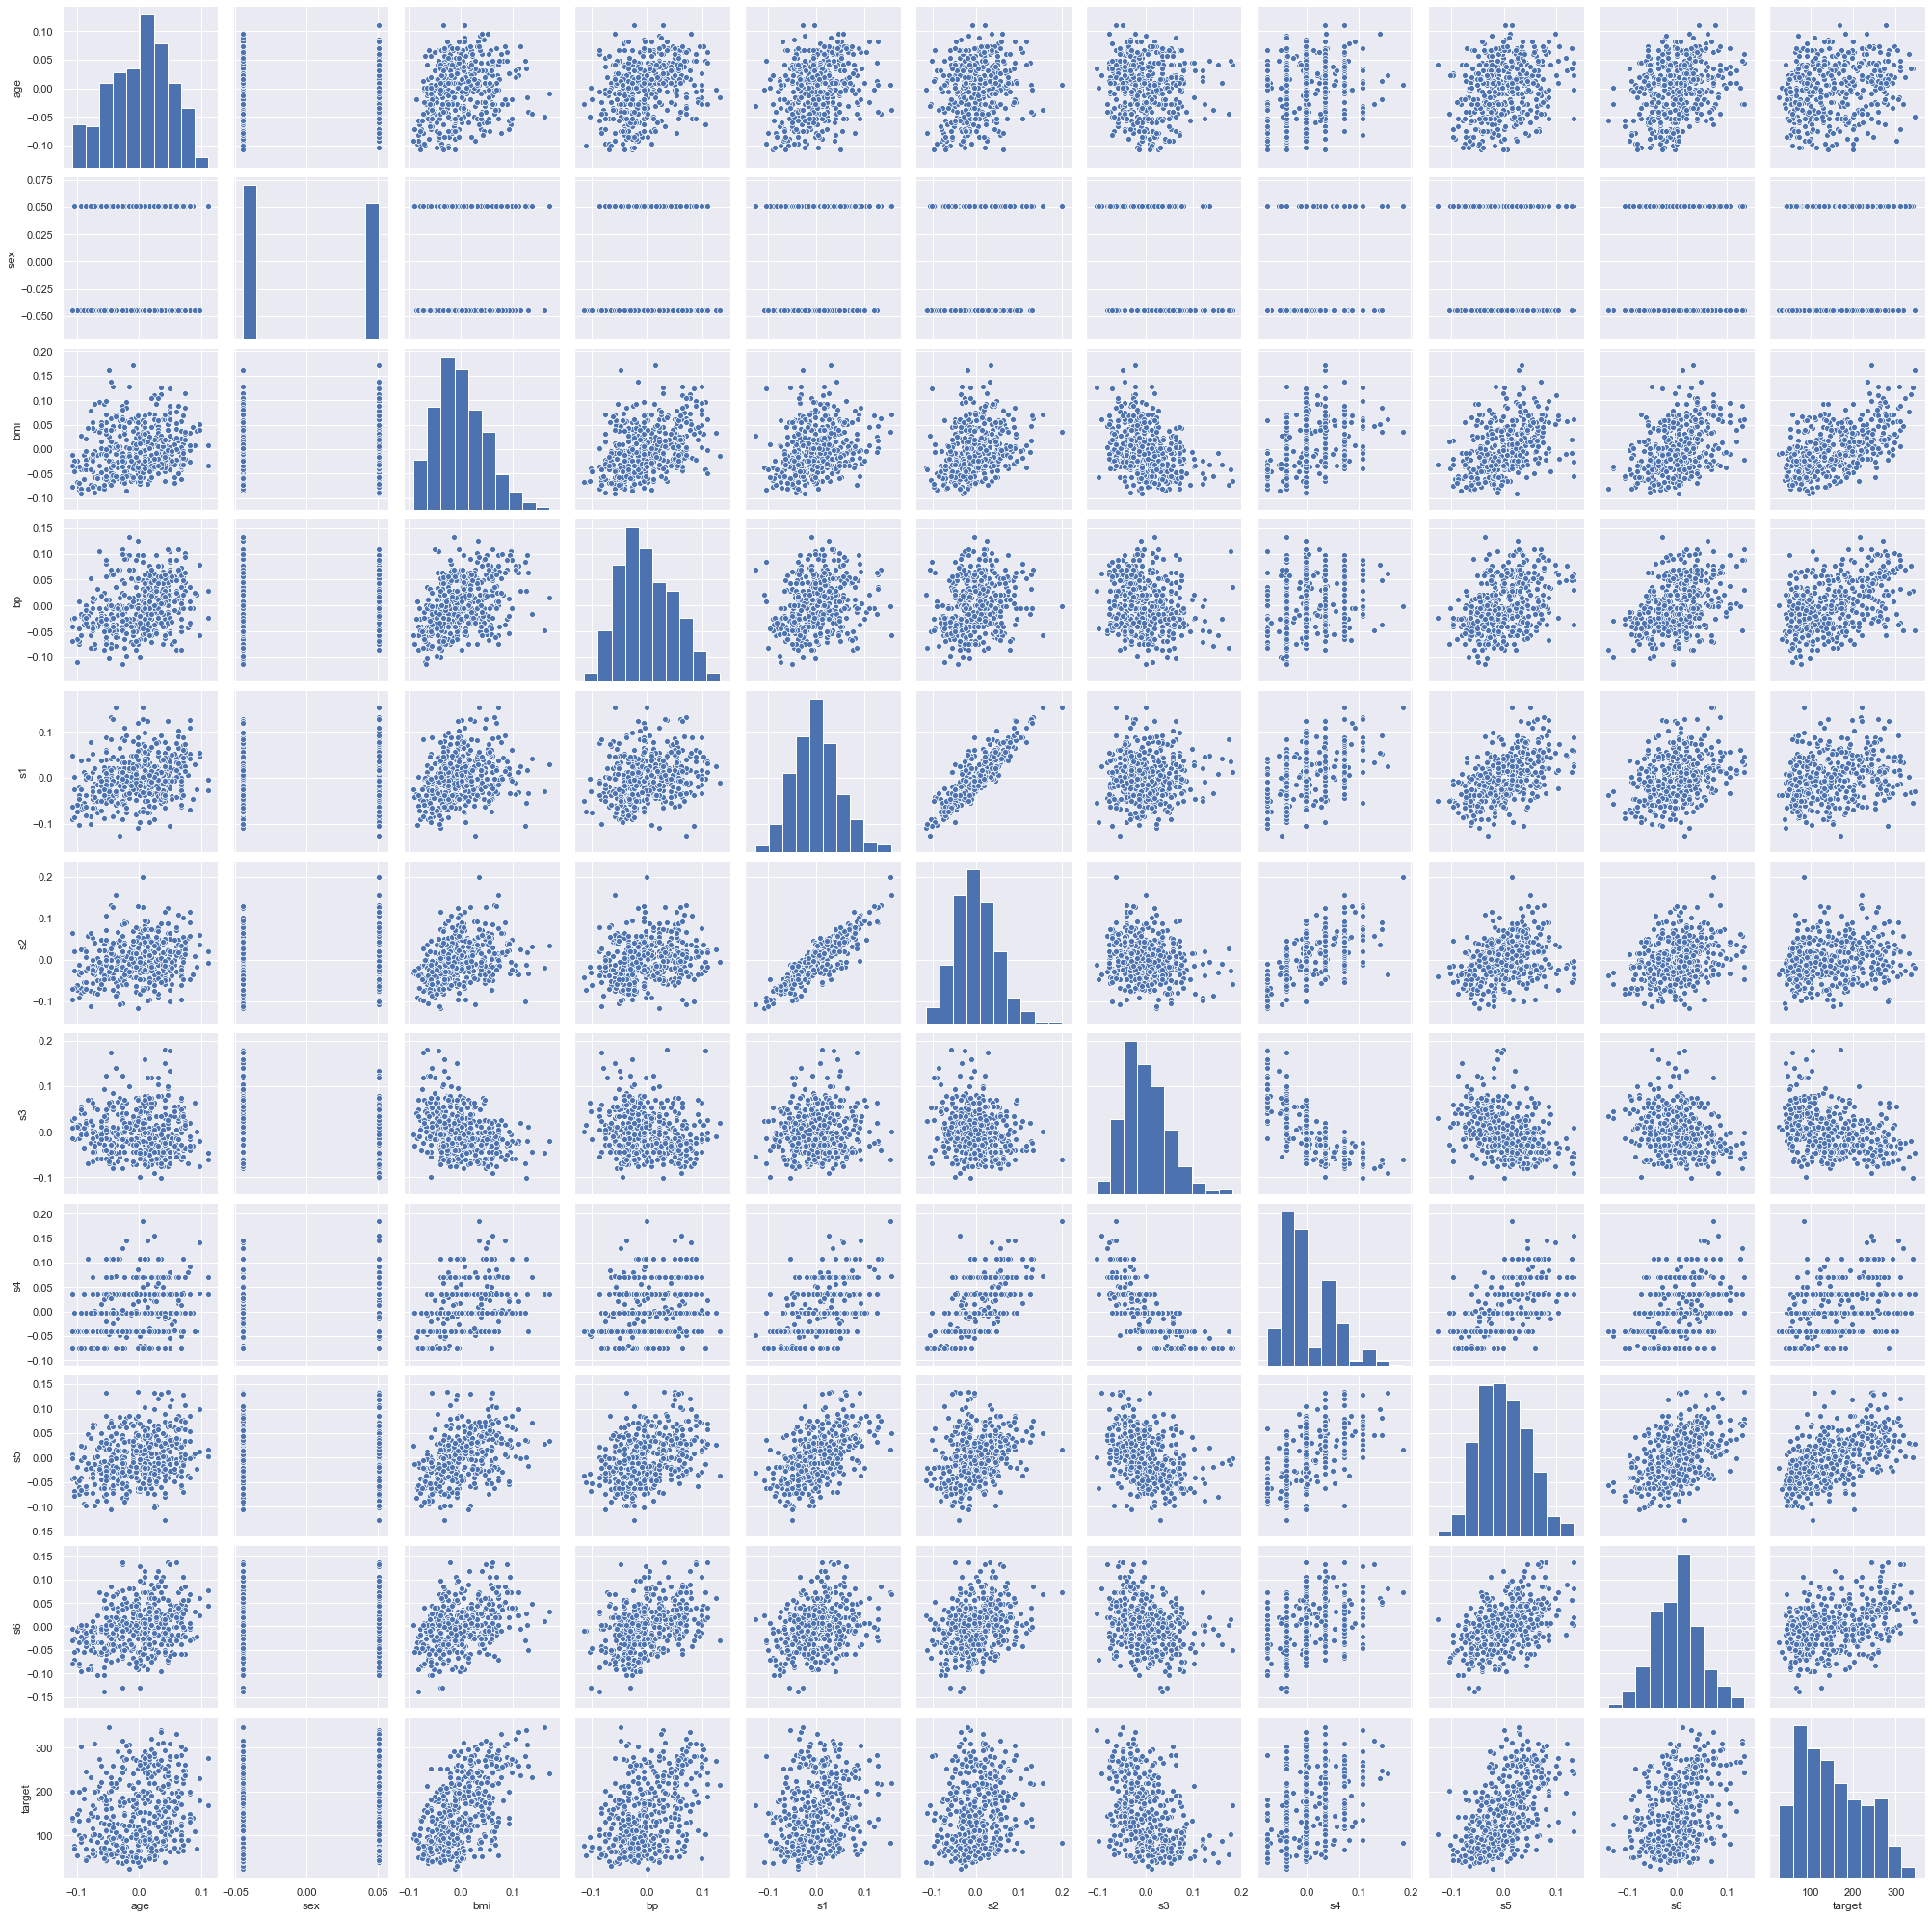

In [16]:
#Lets plot the output
sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(data["target"], bins=20, kde=False)

#Lets plot the features
sns.pairplot(data["frame"])

We can see from the plots that sex is a categorical variable and some variables have strong correlation between them.

Lets first use sklearn to fit the model, then we will use stats model and finally we will use normal equation above

In [30]:
#SKlearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = data["frame"].drop("target",axis=1)
y = data["frame"]["target"]
model.fit(X,y)
print("Coeff =",model.coef_)
print("Intercept =",model.intercept_)
print("Score =",model.score(X,y))

Coeff = [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639]
Intercept = 152.1334841628965
Score = 0.5177494254132934


In [38]:
#Stats model
import statsmodels.api as sm
X = sm.add_constant(X, prepend=False)
model = sm.OLS(y,X)
res = model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Tue, 16 Jun 2020   Prob (F-statistic):           3.83e-62
Time:                        00:00:33   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age          -10.0122     59.749     -0.168      0.8

In [63]:
#Using normal equation
beta = np.matmul(np.linalg.pinv(np.matmul(X.values.T,X.values)),np.dot(X.values.T,y.values))
print("Beta =",beta)
#Compute R2
yhat = np.matmul(X.values,beta)
#Sum of square errors
RSS = np.sum(np.square(y - yhat))
#Total sum of squares
TSS = np.sum(np.square(y-np.mean(y)))
#R2 = 1 - RSS/TSS
r2 = 1 - RSS/TSS
print("R2 =",r2)

Beta = [ -10.01219782 -239.81908937  519.83978679  324.39042769 -792.18416163
  476.74583782  101.04457032  177.06417623  751.27932109   67.62538639
  152.13348416]
R2 = 0.5177494254132934


**All** the three methods give the same answer :-)
